<a href="https://colab.research.google.com/github/ivanjob64/Nair_Proyecto/blob/dev/Modelos_de_Regresi%C3%B3n_VFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

%matplotlib inline

In [2]:
mpl.style.use(['ggplot'])

In [5]:
source_file="servicios.csv"
# Creamos un dataframe a partir del archivo csv descargado
df_servicios2 = pd.read_csv(source_file, sep=';',  encoding='latin-1')
tamano_bytes = os.path.getsize(source_file)
#tamaño de archivo
tamano_mb = tamano_bytes / (1024 * 1024)
print(f"📁 Tamaño del archivo: {tamano_mb:.2f} MB ({tamano_bytes:,} bytes)")
df_servicios2.shape

📁 Tamaño del archivo: 626.71 MB (657,149,228 bytes)


(5590161, 10)

In [6]:
# Estandarización de datos: Asegurar que los campos de tipo fecha son campos de tipo datetime
df_servicios2['FechaHoraConsumo'] = pd.to_datetime(df_servicios2['FechaHoraConsumo'], errors='coerce')
df_servicios2['FechaHoraRespuesta'] = pd.to_datetime(df_servicios2['FechaHoraRespuesta'], errors='coerce')
df_servicios2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5590161 entries, 0 to 5590160
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ï»¿id               int64         
 1   codCliente          object        
 2   canal               int64         
 3   empresaId           int64         
 4   empresa             object        
 5   estado              int64         
 6   intentos            int64         
 7   respuesta           object        
 8   FechaHoraConsumo    datetime64[ns]
 9   FechaHoraRespuesta  datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 426.5+ MB


In [7]:
df_servicios2.rename(columns={'ï»¿id': 'id'}, inplace=True)
df_servicios=df_servicios2[(df_servicios2['FechaHoraConsumo'] < '2025-10-01')]
df_servicios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5518946 entries, 0 to 5590160
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id                  int64         
 1   codCliente          object        
 2   canal               int64         
 3   empresaId           int64         
 4   empresa             object        
 5   estado              int64         
 6   intentos            int64         
 7   respuesta           object        
 8   FechaHoraConsumo    datetime64[ns]
 9   FechaHoraRespuesta  datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 463.2+ MB


In [8]:
df_servicios['empresaId']=df_servicios['empresaId']+10000
df_servicios['codCliente'] = df_servicios['codCliente'].apply(lambda x: x[:3] + '*' * (len(x) - 3))

/tmp/ipython-input-1735569326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_servicios['empresaId']=df_servicios['empresaId']+10000


TypeError: 'float' object is not subscriptable

In [9]:
df_servicios.head(5)

,id,codCliente,canal,empresaId,empresa,estado,intentos,respuesta,FechaHoraConsumo,FechaHoraRespuesta
0,555555,101******************,240,20004,EPSAS,1,0,Pago procesado correctamente,2024-06-15 12:16:11,2024-06-15 12:16:11
1,555556,101******,240,20006,DELAPAZ,1,0,Pago finalizado exitosamente,2024-06-15 12:16:22,2024-06-15 12:16:22
2,555557,101******,240,20006,DELAPAZ,1,0,Pago finalizado exitosamente,2024-06-15 12:16:22,2024-06-15 12:16:22
3,555558,102******************,240,20004,EPSAS,1,0,Pago procesado correctamente,2024-06-15 12:16:43,2024-06-15 12:16:43
4,555559,139***,223,20007,YPFB,1,0,Pago confirmado,2024-06-15 12:16:47,2024-06-15 12:16:47


**Preparación de Datos:**

In [10]:
#lista registros nulos
df_servicios[df_servicios.isnull().any(axis=1)]

,id,codCliente,canal,empresaId,empresa,estado,intentos,respuesta,FechaHoraConsumo,FechaHoraRespuesta
6470,562025,NaN,240,20007,YPFB,1,0,Pago confirmado,2024-06-14 16:11:02,2024-06-14 16:11:02
20661,576216,NaN,223,20030,CESSA,1,0,Se completo el pago,2024-06-12 12:00:41,2024-06-12 12:00:41
39322,594877,NaN,223,20007,YPFB,1,0,Pago confirmado,2024-06-10 11:02:42,2024-06-10 11:02:42
49000,604555,NaN,223,20033,COOPLAN,1,0,Pago realizado correctamente,2024-06-09 22:01:53,2024-06-09 22:01:53
68413,623968,NaN,240,20007,YPFB,1,0,Pago confirmado,2024-06-06 19:40:14,2024-06-06 19:40:14
...,...,...,...,...,...,...,...,...,...,...
5558794,612913,NaN,223,21035,COSAALT,2,2,Error al establecer conexiÃ³n con el servidor,2025-02-03 16:40:38,2025-02-03 16:40:38
5558795,612914,NaN,223,21035,COSAALT,2,5,Error al establecer conexiÃ³n con el servidor,2025-02-03 16:41:05,2025-02-03 16:41:05
5561370,615489,NaN,223,21035,COSAALT,2,3,Error al establecer conexiÃ³n con el servidor,2025-01-07 11:40:53,2025-01-07 11:40:53
5583648,637767,NaN,240,20007,YPFB,2,1,Fallo en la infraestructura tecnolÃ³gica,2024-08-07 18:03:57,2024-08-07 18:03:57


In [11]:
#cantidad de registros nulos
df_servicios.isna().sum()
#llena campos vacíos por la media
#df_servicios.fillna(df_servicios.mean())

,0
id,0
codCliente,517
canal,0
empresaId,0
empresa,0
estado,0
intentos,0
respuesta,0
FechaHoraConsumo,0
FechaHoraRespuesta,0


In [12]:
#lista registros duplicados
df_servicios.duplicated().sum()
#elimina registros duplicados
#f_servicios.dropduplicated()

np.int64(0)

In [13]:
#elimina registros nulos
df_servicios = df_servicios.dropna()

In [14]:
#listar valores únicos de campo intentos
df_servicios['intentos'].unique()

array([0, 5, 1, 4, 2, 3])

In [15]:
#completar con valor 0 campo codCliente que contienen valores nulos  ***NO
#df_servicios['codCliente'] = df_servicios['codCliente'].fillna(0)
#df_servicios[df_servicios.isnull().any(axis=1)]

In [16]:
fecha_min = df_servicios['FechaHoraConsumo'].min()
fecha_max = df_servicios['FechaHoraConsumo'].max()

print("Fecha mínima:", fecha_min)
print("Fecha máxima:", fecha_max)

Fecha mínima: 2024-04-01 04:22:08
Fecha máxima: 2025-09-30 23:54:53


In [17]:
# listar empresas y cantidad de pagos
conteo = df_servicios['empresa'].value_counts().reset_index()
conteo.columns = ['empresa', 'frecuencia']
print(conteo)

      empresa  frecuencia
0        YPFB     1527057
1     DELAPAZ     1487052
2       EPSAS      624241
3         CRE      545821
4       ELFEC      442332
5    SAGUAPAC      222195
6       CESSA      177911
7      ELAPAS       65020
8      SEMAPA       64204
9     Cooplan       57226
10       ENDE       50222
11      SETAR       49116
12       SELA       43579
13     EMAPAV       43119
14    COSAALT       30277
15    COOPLAN       27686
16      SEPSA       22423
17    EMTAGAS       18669
18    COSIMBO       15476
19  ENDE BENI        4470
20      CAPAG         333


In [18]:
# listar canales y cantidad de pagos
conteo = df_servicios['canal'].value_counts().reset_index()
conteo.columns = ['canal', 'frecuencia']
print(conteo)

   canal  frecuencia
0    240     3257762
1    223      898959
2    102      722381
3    101      633737
4      5        2787
5    224        2603
6      0         101
7    104          78
8    107          21


In [19]:
#Crear columnas de periodo: año-mes, día y hora
df_servicios['FechaHoraConsumo'] = pd.to_datetime(df_servicios['FechaHoraConsumo'])
df_servicios['mes'] = df_servicios['FechaHoraConsumo'].dt.to_period('M')
df_servicios['dia_promedio'] = df_servicios['FechaHoraConsumo'].dt.dayofweek
df_servicios['hora_promedio'] = df_servicios['FechaHoraConsumo'].dt.hour



In [20]:
df_servicios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5518429 entries, 0 to 5590160
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id                  int64         
 1   codCliente          object        
 2   canal               int64         
 3   empresaId           int64         
 4   empresa             object        
 5   estado              int64         
 6   intentos            int64         
 7   respuesta           object        
 8   FechaHoraConsumo    datetime64[ns]
 9   FechaHoraRespuesta  datetime64[ns]
 10  mes                 period[M]     
 11  dia_promedio        int32         
 12  hora_promedio       int32         
dtypes: datetime64[ns](2), int32(2), int64(5), object(3), period[M](1)
memory usage: 547.3+ MB


In [21]:
pagos_mes = df_servicios.groupby(['empresa', 'mes']).agg(
    total_pagos=('id', 'count'),
    #exitos=('estado', lambda x: (x == 1).sum()),
    #errores=('estado', lambda x: (x != 1).sum()),
    tasa_exitos=('estado', lambda x: (x == 1).mean()),
    #tasa_errores=('estado', lambda x: (x != 1).mean()),
    promedio_intentos=('intentos', 'mean'),
    hora_promedio=('hora_promedio', 'mean'),
    dia_promedio=('dia_promedio', 'mean'),
).reset_index()

In [22]:
#Calcular incremento mensual por empresa
pagos_mes = pagos_mes.sort_values(by=['empresa', 'mes'])
pagos_mes['incremento'] = pagos_mes.groupby('empresa')['total_pagos'].diff().fillna(0)

#calculo de variable objetivo (incremento) de pagos con respecto al anterior mes
pagos_mes['incremento'] = pagos_mes.groupby('empresa')['total_pagos'].diff()
#Reemplazar valores nulos (primer mes sin comparación)
pagos_mes['incremento'] = pagos_mes['incremento'].fillna(0)


In [23]:
# Agregar columna para indicar tendencia
pagos_mes['tendencia'] = pagos_mes['incremento'].apply(
    lambda x: 'Incremento'
    if x > 0 else ('Disminución' if x < 0 else 'Sin cambio')
)


In [24]:
pagos_mes['incremento'] = pagos_mes['incremento'].astype('int64')
pagos_mes['mes_num'] = pagos_mes['mes'].dt.month
pagos_mes['var_pagos'] = pagos_mes['total_pagos'].pct_change().fillna(0)

In [25]:
empresas = pagos_mes['empresa'].unique()
print (empresas)

['CAPAG' 'CESSA' 'COOPLAN' 'COSAALT' 'COSIMBO' 'CRE' 'Cooplan' 'DELAPAZ'
 'ELAPAS' 'ELFEC' 'EMAPAV' 'EMTAGAS' 'ENDE' 'ENDE BENI' 'EPSAS' 'SAGUAPAC'
 'SELA' 'SEMAPA' 'SEPSA' 'SETAR' 'YPFB']


In [26]:
pagos_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   empresa            314 non-null    object   
 1   mes                314 non-null    period[M]
 2   total_pagos        314 non-null    int64    
 3   tasa_exitos        314 non-null    float64  
 4   promedio_intentos  314 non-null    float64  
 5   hora_promedio      314 non-null    float64  
 6   dia_promedio       314 non-null    float64  
 7   incremento         314 non-null    int64    
 8   tendencia          314 non-null    object   
 9   mes_num            314 non-null    int64    
 10  var_pagos          314 non-null    float64  
dtypes: float64(5), int64(3), object(2), period[M](1)
memory usage: 27.1+ KB


In [27]:
#agregar campo tendencia_num de tipo numérico
mapa_tendencia = {'Disminución': -1, 'Sin cambio': 0, 'Incremento': 1}
pagos_mes['tendencia_num'] = pagos_mes['tendencia'].map(mapa_tendencia)
pagos_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   empresa            314 non-null    object   
 1   mes                314 non-null    period[M]
 2   total_pagos        314 non-null    int64    
 3   tasa_exitos        314 non-null    float64  
 4   promedio_intentos  314 non-null    float64  
 5   hora_promedio      314 non-null    float64  
 6   dia_promedio       314 non-null    float64  
 7   incremento         314 non-null    int64    
 8   tendencia          314 non-null    object   
 9   mes_num            314 non-null    int64    
 10  var_pagos          314 non-null    float64  
 11  tendencia_num      314 non-null    int64    
dtypes: float64(5), int64(4), object(2), period[M](1)
memory usage: 29.6+ KB


In [28]:
pagos_mes.head(5)

,empresa,mes,total_pagos,tasa_exitos,promedio_intentos,hora_promedio,dia_promedio,incremento,tendencia,mes_num,var_pagos,tendencia_num
0,CAPAG,2025-06,34,1.000000,0.000000,15.323529,2.617647,0,Sin cambio,6,0.000000,0
1,CAPAG,2025-07,59,1.000000,0.000000,12.881356,2.271186,25,Incremento,7,0.735294,1
2,CAPAG,2025-08,90,0.988889,0.044444,13.522222,2.533333,31,Incremento,8,0.525424,1
3,CAPAG,2025-09,150,0.993333,0.033333,13.886667,2.266667,60,Incremento,9,0.666667,1
4,CESSA,2024-04,7967,0.996486,0.009288,12.274884,2.040668,0,Sin cambio,4,52.113333,0


In [29]:
#permitirá detectar patrones específicos por época del año
pagos_mes['mes_num'] = pagos_mes['mes'].dt.month
pagos_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   empresa            314 non-null    object   
 1   mes                314 non-null    period[M]
 2   total_pagos        314 non-null    int64    
 3   tasa_exitos        314 non-null    float64  
 4   promedio_intentos  314 non-null    float64  
 5   hora_promedio      314 non-null    float64  
 6   dia_promedio       314 non-null    float64  
 7   incremento         314 non-null    int64    
 8   tendencia          314 non-null    object   
 9   mes_num            314 non-null    int64    
 10  var_pagos          314 non-null    float64  
 11  tendencia_num      314 non-null    int64    
dtypes: float64(5), int64(4), object(2), period[M](1)
memory usage: 29.6+ KB


In [30]:
#Crear variable var_pagos que calcula la variación porcentual de pagos entre registros consecutivos
pagos_mes['var_pagos'] = pagos_mes['total_pagos'].pct_change().fillna(0)
pagos_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   empresa            314 non-null    object   
 1   mes                314 non-null    period[M]
 2   total_pagos        314 non-null    int64    
 3   tasa_exitos        314 non-null    float64  
 4   promedio_intentos  314 non-null    float64  
 5   hora_promedio      314 non-null    float64  
 6   dia_promedio       314 non-null    float64  
 7   incremento         314 non-null    int64    
 8   tendencia          314 non-null    object   
 9   mes_num            314 non-null    int64    
 10  var_pagos          314 non-null    float64  
 11  tendencia_num      314 non-null    int64    
dtypes: float64(5), int64(4), object(2), period[M](1)
memory usage: 29.6+ KB


In [31]:
pagos_mes.isna().sum()

,0
empresa,0
mes,0
total_pagos,0
tasa_exitos,0
promedio_intentos,0
hora_promedio,0
dia_promedio,0
incremento,0
tendencia,0
mes_num,0


In [32]:
#calcular matriz de correlación
corr_pagos = pagos_mes.corr(numeric_only=True)
corr_pagos

,total_pagos,tasa_exitos,promedio_intentos,hora_promedio,dia_promedio,incremento,mes_num,var_pagos,tendencia_num
total_pagos,1.000000,0.063139,-0.067004,0.195858,-0.079618,0.446571,-0.026645,-0.017254,-0.040333
tasa_exitos,0.063139,1.000000,-0.991556,0.386227,-0.370811,0.011568,-0.066793,0.033038,-0.007366
promedio_intentos,-0.067004,-0.991556,1.000000,-0.331336,0.353024,-0.010243,0.071328,-0.030874,0.016697
hora_promedio,0.195858,0.386227,-0.331336,1.000000,-0.137029,0.089779,-0.035381,-0.045800,0.067252
dia_promedio,-0.079618,-0.370811,0.353024,-0.137029,1.000000,-0.161163,-0.017680,-0.040810,-0.087464
incremento,0.446571,0.011568,-0.010243,0.089779,-0.161163,1.000000,0.039801,-0.005279,0.404261
mes_num,-0.026645,-0.066793,0.071328,-0.035381,-0.017680,0.039801,1.000000,-0.002448,0.021196
var_pagos,-0.017254,0.033038,-0.030874,-0.045800,-0.040810,-0.005279,-0.002448,1.000000,0.025254
tendencia_num,-0.040333,-0.007366,0.016697,0.067252,-0.087464,0.404261,0.021196,0.025254,1.000000


<Axes: >

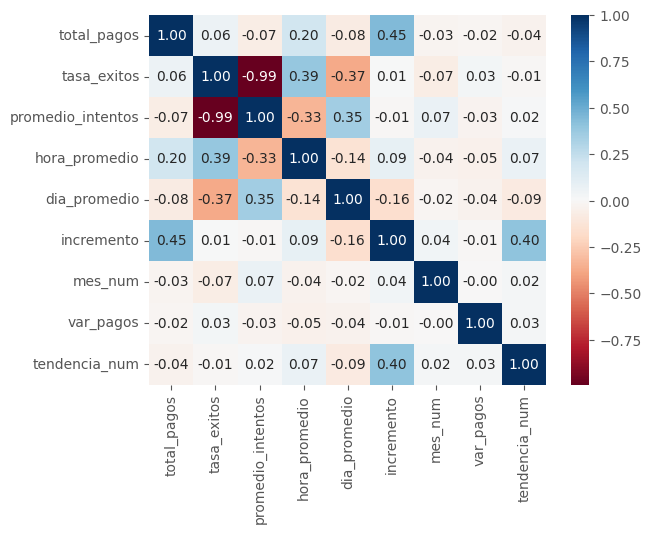

In [33]:
#matriz de correlación
sns.heatmap(corr_pagos, annot=True, cmap="RdBu", fmt=".2f")

In [34]:
#definir variable objetivo y prodictorias
y = pagos_mes['incremento']
X = pagos_mes[['total_pagos', 'tasa_exitos','promedio_intentos','tendencia_num','mes_num','var_pagos','hora_promedio','dia_promedio']]



In [35]:
#ver coheficientes del modelo
print("✅ Dataset enriquecido con éxito")
print("Dimensiones de X:", X.shape)
print("Variables predictoras:", list(X.columns))

✅ Dataset enriquecido con éxito
Dimensiones de X: (314, 8)
Variables predictoras: ['total_pagos', 'tasa_exitos', 'promedio_intentos', 'tendencia_num', 'mes_num', 'var_pagos', 'hora_promedio', 'dia_promedio']


In [36]:
#dividir datos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
#mostrar cantidad de datos entrenados

print(f" X_train → {X_train.shape[0]} registros y {X_train.shape[1]} columnas")
print(f" X_test  → {X_test.shape[0]} registros y {X_test.shape[1]} columnas")
print(f" y_train → {y_train.shape[0]} registros y 1 columna (variable objetivo)")
print(f" y_test  → {y_test.shape[0]} registros y 1 columna (variable objetivo)")

 X_train → 251 registros y 8 columnas
 X_test  → 63 registros y 8 columnas
 y_train → 251 registros y 1 columna (variable objetivo)
 y_test  → 63 registros y 1 columna (variable objetivo)


**PRIMER MODELO: REGRESIÓN LINEAL MÚLTIPLE**

In [38]:
#NORMALIZACIÓN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Crear modelo
modelo = LinearRegression()

# Entrenar modelo con datos de entrenamiento
modelo.fit(X_train, y_train)

#ver coheficientes del modelo
print("Intercepto (β₀):", modelo.intercept_)
print("Coeficientes (β):", modelo.coef_)


Intercepto (β₀): 2490.599174059421
Coeficientes (β): [ 6.15105732e-02  1.63568969e+03  9.78174961e+02  1.81829474e+03
  5.63350239e+01 -1.26978718e+01 -8.73851417e+01 -1.86803747e+03]


In [40]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)
# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("📊 Resultados del modelo de regresión lineal:")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.2f}")

📊 Resultados del modelo de regresión lineal:
MAE (Error Absoluto Medio): 1391.80
RMSE (Raíz del Error Cuadrático Medio): 2093.56
R² (Coeficiente de determinación): 0.22


**SEGUNDO MODELO: RANDOM FOREST REGRESSOR**

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [42]:
# Crear modelo RandomForest
rf_model = RandomForestRegressor(
    n_estimators=100,   # cantidad de árboles
    max_depth= 10,       # profundidad máxima de cada árbol

    random_state=42
)
# Entrenar
rf_model.fit(X_train, y_train)
# Predecir
y_pred = rf_model.predict(X_test)

# Evaluar desempeño
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Resultados RandomForestRegressor:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

📊 Resultados RandomForestRegressor:
MAE: 300.72
RMSE: 606.75
R²: 0.93


***CURVAS DE MODELOS DE REGRESIÓN***

In [43]:
from sklearn.model_selection import learning_curve

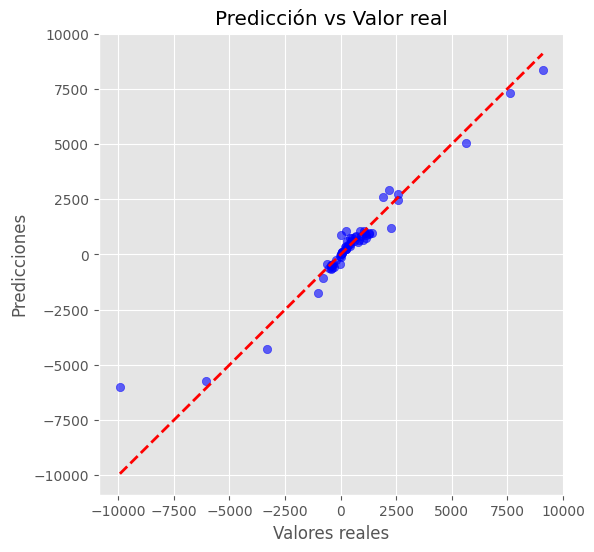

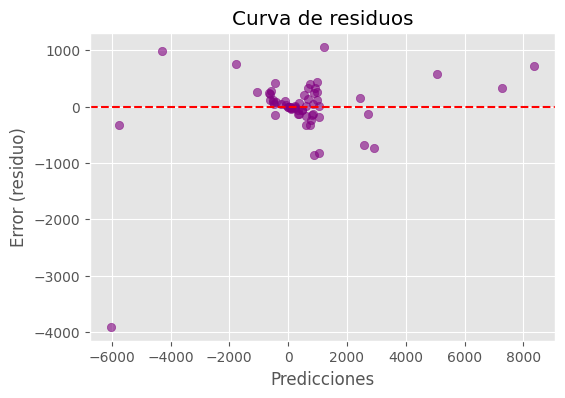

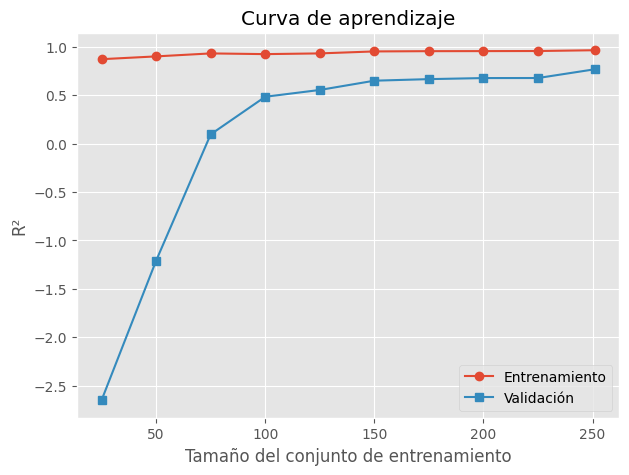

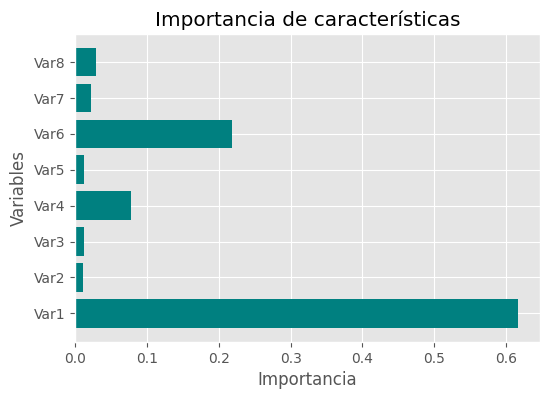

In [44]:
# CURVA: Predicción vs Valor Real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicción vs Valor real')
plt.grid(True)
plt.show()

# CURVA: Residuos
residuos = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuos, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Error (residuo)')
plt.title('Curva de residuos')
plt.grid(True)
plt.show()

#  CURVA: Learning Curve (Curva de aprendizaje)
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5,
    scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, 'o-', label='Entrenamiento')
plt.plot(train_sizes, test_mean, 's-', label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('R²')
plt.title('Curva de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()

# CURVA: Importancia de características
if hasattr(rf_model, 'feature_importances_'):
    importancia = rf_model.feature_importances_
    features = [f'Var{i+1}' for i in range(X.shape[1])]
    plt.figure(figsize=(6,4))
    plt.barh(features, importancia, color='teal')
    plt.xlabel('Importancia')
    plt.ylabel('Variables')
    plt.title('Importancia de características')
    plt.grid(True, axis='x')
    plt.show()
else:
    print("⚠️ Este modelo no tiene atributo 'feature_importances_'.")

In [56]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Carpeta donde se guardarán las imágenes
OUT_DIR = "plots"
os.makedirs(OUT_DIR, exist_ok=True)

def savefig(name: str):
    path = os.path.join(OUT_DIR, f"{name}.jpg")
    plt.savefig(
        path,
        dpi=300,
        bbox_inches="tight",
        format="jpg"
    )
    plt.close()
    print("✅ Guardado:", path)

# 1) Predicción vs Valor Real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    '--', lw=2
)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicción vs Valor real')
plt.grid(True)
savefig("pred_vs_real")

# 2) Residuos
residuos = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuos, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Error (residuo)')
plt.title('Curva de residuos')
plt.grid(True)
savefig("residuos")

# 3) Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5,
    scoring='r2',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, 'o-', label='Entrenamiento')
plt.plot(train_sizes, test_mean, 's-', label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('R²')
plt.title('Curva de aprendizaje')
plt.legend()
plt.grid(True)
savefig("learning_curve")

# 4) Importancia de características
if hasattr(rf_model, 'feature_importances_'):
    importancia = rf_model.feature_importances_
    features = [f'Var{i+1}' for i in range(X.shape[1])]
    plt.figure(figsize=(6,4))
    plt.barh(features, importancia)
    plt.xlabel('Importancia')
    plt.ylabel('Variables')
    plt.title('Importancia de características')
    plt.grid(True, axis='x')
    savefig("feature_importance")
else:
    print("⚠️ Este modelo no tiene atributo 'feature_importances_'")

✅ Guardado: plots/pred_vs_real.jpg
✅ Guardado: plots/residuos.jpg
✅ Guardado: plots/learning_curve.jpg
✅ Guardado: plots/feature_importance.jpg


In [62]:
import requests

url = "https://maryann-uncommingled-ballistically.ngrok-free.dev/plot/residuos.jpg"
r = requests.get(url, headers={"User-Agent": "PowerBI"})
print("status:", r.status_code)
print("content-type:", r.headers.get("Content-Type"))
print("primeros bytes:", r.content[:20])
print("parece html?:", b"<html" in r.content[:200].lower())



status: 404
content-type: text/html
primeros bytes: b'<!DOCTYPE html>\n<htm'
parece html?: True


In [68]:
!pip -q install flask pyngrok

import os
from flask import Flask, send_file, jsonify, make_response, request
from pyngrok import ngrok

PLOTS_DIR = "plots"

app = Flask(__name__)

# (Opcional) Página raíz para evitar 404 al abrir la URL base
@app.route("/residuos.jpg", methods=["GET", "HEAD"])
def residuos_jpg():
    path = os.path.join("plots", "residuos.jpg")
    if not os.path.exists(path):
        return {"error":"no existe residuos.jpg"}, 404

    resp = make_response(send_file(path, mimetype="image/jpeg"))
    resp.headers["Content-Disposition"] = 'inline; filename="residuos.jpg"'
    resp.headers["Cache-Control"] = "no-store, max-age=0"
    resp.headers["Accept-Ranges"] = "bytes"
    resp.headers["Content-Length"] = str(os.path.getsize(path))

# Listado de imágenes disponibles (JPG)
@app.route("/plots", methods=["GET"])
def list_plots():
    if not os.path.exists(PLOTS_DIR):
        return jsonify({"error": "No existe la carpeta plots. Genera las imágenes primero."}), 404

    files = sorted([f for f in os.listdir(PLOTS_DIR) if f.lower().endswith(".jpg")])
    return jsonify({
        "available": files,
        # endpoints con extensión .jpg explícita
        "endpoints": [f"/plot/{os.path.splitext(f)[0]}.jpg" for f in files],
        # tip para Power BI / ngrok
        "powerbi_tip": "Si Power BI no renderiza, prueba agregando ?ngrok-skip-browser-warning=true a la URL"
    })

def _image_response(path: str, filename: str):
    """
    Respuesta 'PowerBI-friendly':
    - Headers estrictos (Content-Type, Length, Cache-Control)
    - Accept-Ranges (algunos clientes lo esperan)
    - Inline para evitar descargas
    """
    resp = make_response(send_file(path, mimetype="image/jpeg", conditional=True))
    resp.headers["Content-Type"] = "image/jpeg"
    resp.headers["Content-Disposition"] = f'inline; filename="{filename}"'
    resp.headers["Cache-Control"] = "no-store, max-age=0"
    resp.headers["Accept-Ranges"] = "bytes"
    resp.headers["Content-Length"] = str(os.path.getsize(path))
    return resp

# Servir imagen JPG específica (soporta GET y HEAD)
@app.route("/plot/<name>.jpg", methods=["GET", "HEAD"])
def get_plot(name):
    path = os.path.join(PLOTS_DIR, f"{name}.jpg")
    if not os.path.exists(path):
        return jsonify({"error": f"No existe {name}.jpg"}), 404

    # Power BI a veces manda HEAD primero. Respondemos con headers consistentes.
    if request.method == "HEAD":
        resp = make_response("", 200)
        resp.headers["Content-Type"] = "image/jpeg"
        resp.headers["Cache-Control"] = "no-store, max-age=0"
        resp.headers["Accept-Ranges"] = "bytes"
        resp.headers["Content-Length"] = str(os.path.getsize(path))
        resp.headers["Content-Disposition"] = f'inline; filename="{name}.jpg"'
        return resp

    return _image_response(path, f"{name}.jpg")

# ngrok
ngrok.set_auth_token("35tX7B3Cib1BC7seFNyowX8e4Nr_7aGVesw5vDqtGsHfXBWvV")
public_url = ngrok.connect(5000, "http")

print("🌍 URL base:", public_url)
print("📌 Listado:", f"{public_url}/plots")

# URLs recomendadas para Power BI (con skip warning)
print("🖼️ pred_vs_real:", f"{public_url}/plot/pred_vs_real.jpg?ngrok-skip-browser-warning=true")
print("🖼️ residuos:", f"{public_url}/plot/residuos.jpg?ngrok-skip-browser-warning=true")
print("🖼️ learning_curve:", f"{public_url}/plot/learning_curve.jpg?ngrok-skip-browser-warning=true")
print("🖼️ feature_importance:", f"{public_url}/plot/feature_importance.jpg?ngrok-skip-browser-warning=true")

app.run(port=5000)




🌍 URL base: NgrokTunnel: "https://maryann-uncommingled-ballistically.ngrok-free.dev" -> "http://localhost:5000"
📌 Listado: NgrokTunnel: "https://maryann-uncommingled-ballistically.ngrok-free.dev" -> "http://localhost:5000"/plots
🖼️ pred_vs_real: NgrokTunnel: "https://maryann-uncommingled-ballistically.ngrok-free.dev" -> "http://localhost:5000"/plot/pred_vs_real.jpg?ngrok-skip-browser-warning=true
🖼️ residuos: NgrokTunnel: "https://maryann-uncommingled-ballistically.ngrok-free.dev" -> "http://localhost:5000"/plot/residuos.jpg?ngrok-skip-browser-warning=true
🖼️ learning_curve: NgrokTunnel: "https://maryann-uncommingled-ballistically.ngrok-free.dev" -> "http://localhost:5000"/plot/learning_curve.jpg?ngrok-skip-browser-warning=true
🖼️ feature_importance: NgrokTunnel: "https://maryann-uncommingled-ballistically.ngrok-free.dev" -> "http://localhost:5000"/plot/feature_importance.jpg?ngrok-skip-browser-warning=true
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [15/Dec/2025 05:53:28] "GET /plot/learning_curve.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Dec/2025 05:53:33] "GET /plot/learning_curve.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Dec/2025 05:54:36] "GET /plot/feature_importance.jpg HTTP/1.1" 200 -


In [54]:
import requests

# Assuming 'public_url' from the previous cell is still valid
plots_list_url = f'{public_url.public_url}/plots'

try:
    response = requests.get(plots_list_url)
    response.raise_for_status() # Raise an exception for HTTP errors (4xx or 5xx)
    print(f"Estado de la respuesta: {response.status_code}")
    print(f"Contenido de /plots: {response.json()}")
except requests.exceptions.RequestException as e:
    print(f"Error al acceder a {plots_list_url}: {e}")

Error al acceder a https://maryann-uncommingled-ballistically.ngrok-free.dev/plots: 404 Client Error: Not Found for url: https://maryann-uncommingled-ballistically.ngrok-free.dev/plots


**XGBOOST REGRESSOR**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#dividir datos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Crear modelo XGBRegressor
modelo_xgb = XGBRegressor(
    n_estimators=200,      # número de árboles
    learning_rate=0.1,     # tasa de aprendizaje
    max_depth=6,           # profundidad de los árboles
    random_state=42
)
#Entrenar
modelo_xgb.fit(X_train, y_train)
#Predecir
y_pred = modelo_xgb.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred)) #squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.9491249918937683
RMSE: 284993.40625
MAE: 300.6618347167969


***CURVAS DE MODELOS DE REGRESIÓN***

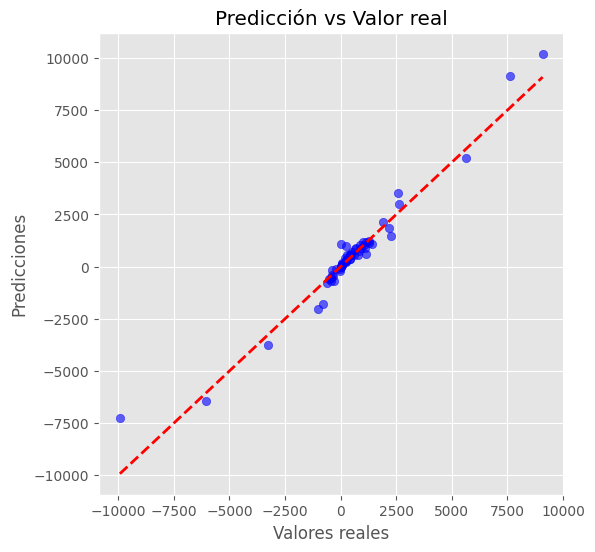

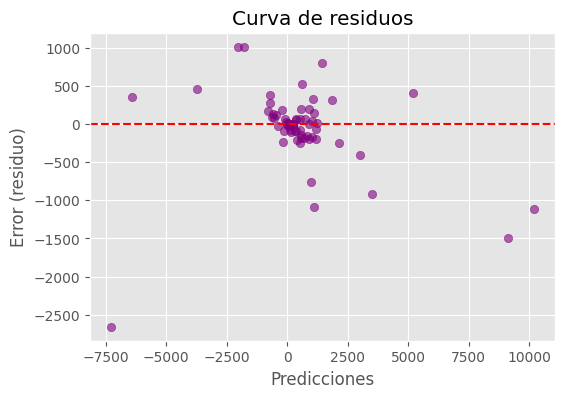

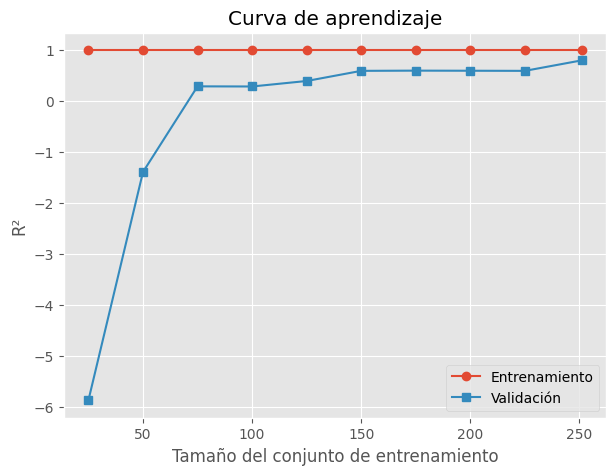

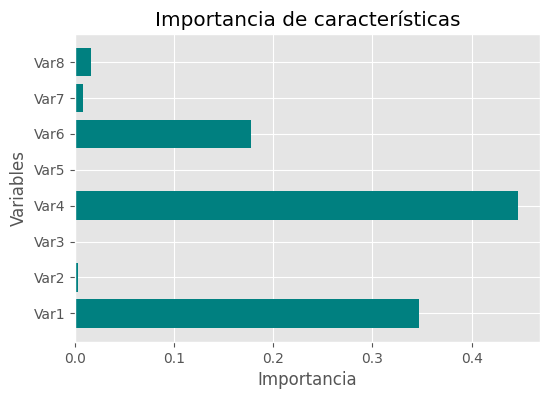

In [ ]:
# CURVA: Predicción vs Valor Real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicción vs Valor real')
plt.grid(True)
plt.show()

# CURVA: Residuos
residuos = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuos, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Error (residuo)')
plt.title('Curva de residuos')
plt.grid(True)
plt.show()

#  CURVA: Learning Curve (Curva de aprendizaje)
train_sizes, train_scores, test_scores = learning_curve(
    modelo_xgb, X, y, cv=5,
    scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, 'o-', label='Entrenamiento')
plt.plot(train_sizes, test_mean, 's-', label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('R²')
plt.title('Curva de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()

# CURVA: Importancia de características
if hasattr(modelo_xgb, 'feature_importances_'):
    importancia = modelo_xgb.feature_importances_
    features = [f'Var{i+1}' for i in range(X.shape[1])]
    plt.figure(figsize=(6,4))
    plt.barh(features, importancia, color='teal')
    plt.xlabel('Importancia')
    plt.ylabel('Variables')
    plt.title('Importancia de características')
    plt.grid(True, axis='x')
    plt.show()
else:
    print("⚠️ Este modelo no tiene atributo 'feature_importances_'.")

**Gradient Boosting Regressor**

In [ ]:
#importar librerías
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Crear el modelo
gbr = GradientBoostingRegressor(
    n_estimators=200,     # número de árboles
    learning_rate=0.1,    # tasa de aprendizaje
    max_depth=5,          # profundidad máxima de cada árbol
    random_state=42
)

# Entrenar el modelo
gbr.fit(X_train, y_train)
#predicción
y_pred = gbr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R2: 0.9432
RMSE: 563.9350
MAE: 285.4054


***CURVAS DE MODELOS DE REGRESIÓN***

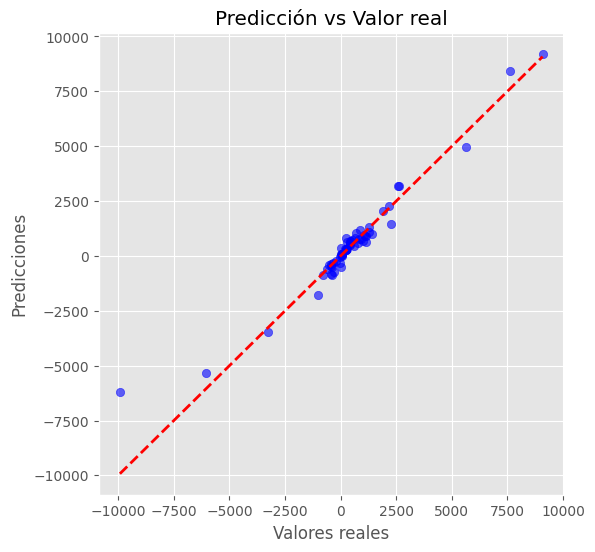

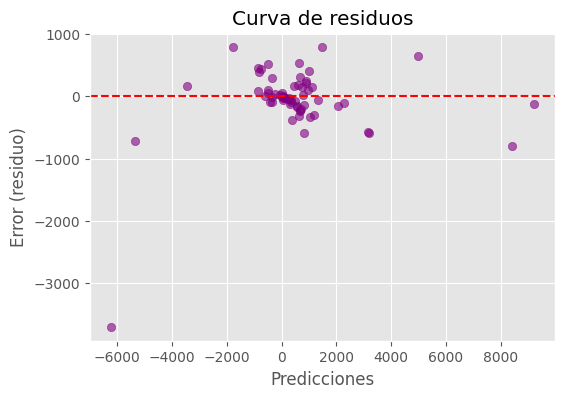

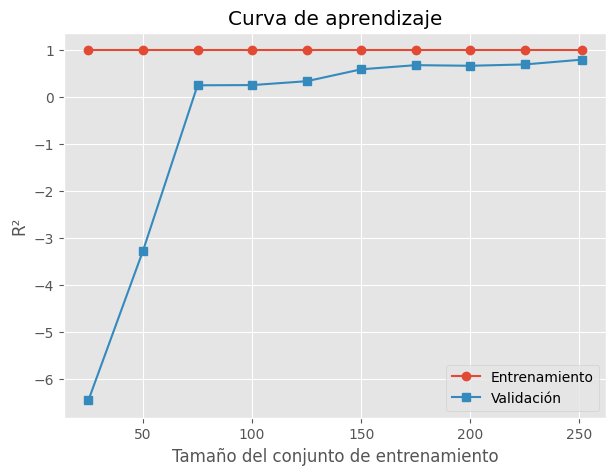

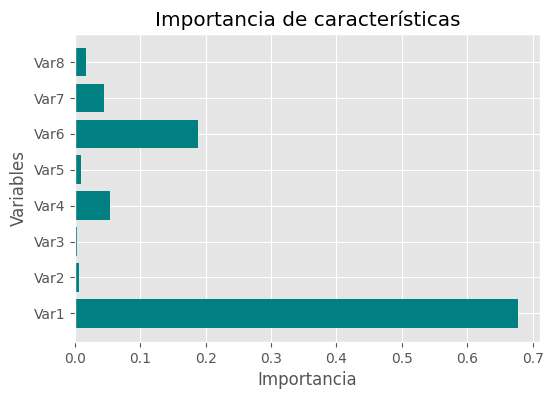

In [ ]:
# CURVA: Predicción vs Valor Real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicción vs Valor real')
plt.grid(True)
plt.show()

# CURVA: Residuos
residuos = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuos, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Error (residuo)')
plt.title('Curva de residuos')
plt.grid(True)
plt.show()

#  CURVA: Learning Curve (Curva de aprendizaje)
train_sizes, train_scores, test_scores = learning_curve(
    gbr, X, y, cv=5,
    scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, 'o-', label='Entrenamiento')
plt.plot(train_sizes, test_mean, 's-', label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('R²')
plt.title('Curva de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()

# CURVA: Importancia de características
if hasattr(gbr, 'feature_importances_'):
    importancia = gbr.feature_importances_
    features = [f'Var{i+1}' for i in range(X.shape[1])]
    plt.figure(figsize=(6,4))
    plt.barh(features, importancia, color='teal')
    plt.xlabel('Importancia')
    plt.ylabel('Variables')
    plt.title('Importancia de características')
    plt.grid(True, axis='x')
    plt.show()
else:
    print("⚠️ Este modelo no tiene atributo 'feature_importances_'.")

**MLP REGRESSOR (RED NEURONAL)**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#NORMALIZACIÓN OPCIÓN 1
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)


In [ ]:
#NORMALIZACIÓN OPCIÓN 2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#dividir datos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Crear modelo MLPRegressor
modelo_mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # 2 capas ocultas
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

#Entrenar
modelo_mlp.fit(X_train, y_train)

#Predecir
y_pred = modelo_mlp.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, ))#squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.614390236089595
RMSE: 2160122.476327151
MAE: 896.7234238428834


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
